In [18]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import seaborn as sns

In [19]:
seed = 42
np.random.seed(seed)

### Plotando as classes.

In [3]:
# Number of examples.
N = 100

# Create a 2-class dataset for classification.
centers = [[-1, 0], [0, 0]]
x, y = make_blobs(n_samples=N, centers=centers, random_state=seed)

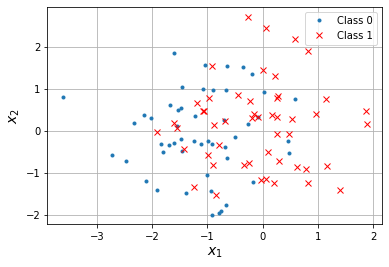

In [4]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

plt.plot(x[idx0,0], x[idx0,1], '.', label='Class 0')
plt.plot(x[idx1,0], x[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
#plt.savefig('knn_for_two_classes.png', dpi=600)
plt.show()

### Variando o número de vizinhos, k.

+ O inverso da distância é usado como peso.

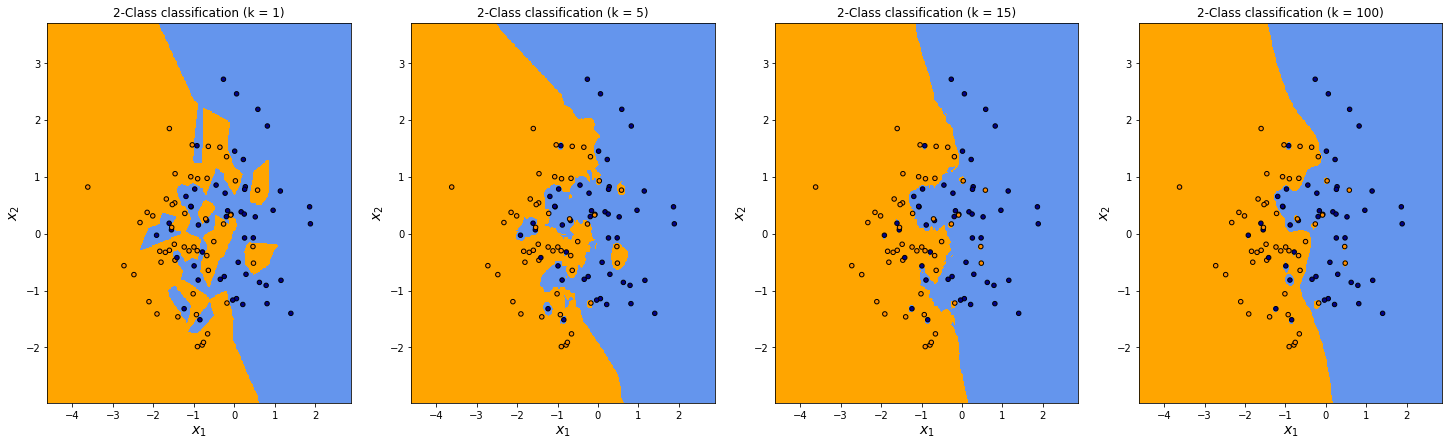

In [5]:
# Step size in the mesh.
h = .02 

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

neighbours = [1, 5, 15, 100]

inc = 0
plt.figure(figsize=(25, 7))
for k in neighbours:
    # Create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(k, weights='distance')
    # Train the classifier.
    clf.fit(x, y)

    # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot.
    Z = Z.reshape(xx.shape)
    ax = plt.subplot(1, 4, inc + 1)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points.
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', fontsize=14)
    plt.title("2-Class classification (k = %i)" % (k))
    inc = inc + 1

#plt.savefig('decision_boundary_knn.png', dpi=600)
plt.show()

+ À medida que 𝑘 aumenta, a fronteira tende a ficar mais suave e menos regiões isoladas são criadas para cada classe.
+ Quanto menor o valor de 𝑘, mais complexo o modelo será, ou seja, a chance dele sobreajustar ao conjunto de treinamento é grande.
+ Quanto maior for o valor de 𝑘, menos complexo será o modelo, consequentemente, mais chances de subajustar.

### Utilizando mais amostras, inverso da distância como peso e variando k de 1 a 200.

In [6]:
# Number of examples.
N = 1000

# Create a 2-class dataset for classification.
centers = [[-1, 0], [0, 0]]
x, y = make_blobs(n_samples=N, centers=centers, random_state=seed)

# Split array into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=23)

acc_train = []
acc_test = []
score_max = 0
k_max = 0
Kmax = 200
for k in range(1,Kmax+1):
    # Create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(k, weights='distance')
    # Train the classifier.
    clf.fit(x_train, y_train)
    # Predict.
    y_pred = clf.predict(x_test)
    # calculate score.
    score_test = clf.score(x_test, y_test)
    acc_test.append(score_test)
    score_train = clf.score(x_train, y_train)
    acc_train.append(score_train)    
    if(score_test > score_max):
        score_max = score_test
        k_max = k

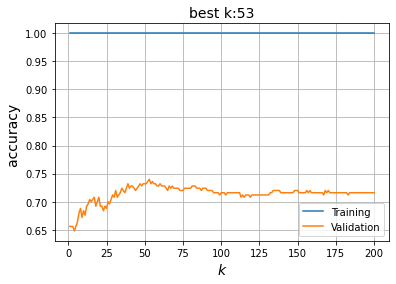

In [7]:
plt.plot(range(1,Kmax+1), acc_train, label='Training')
plt.plot(range(1,Kmax+1), acc_test, label='Validation')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('accuracy ', fontsize=14)
plt.title('best k:'+str(k_max), fontsize=14)
plt.legend()
plt.grid()
plt.show()

+ Como utilizamos o inverso da distância para dar peso aos k vizinhos mais próximos, para a classificação com o conjunto de treinamento, temos classificação perfeita.

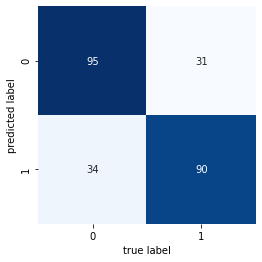

In [8]:
# Create an instance of Neighbours Classifier and fit the data with best k.
clf = KNeighborsClassifier(k_max, weights='distance')
# Train the classifier.
clf.fit(x_train, y_train)
# Predict.
y_pred = clf.predict(x_test)

# Plot the confusion matrix.
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('confusion_matrix.png', dpi=600)
plt.show()

In [9]:
print('Accuracy of Logistic Regression model is:', accuracy_score(y_test, y_pred)*100, '%')

Accuracy of Logistic Regression model is: 74.0 %


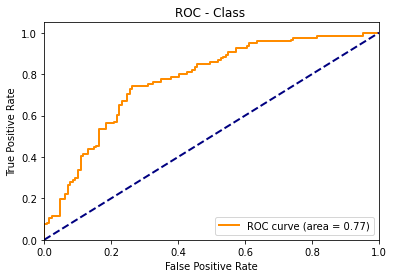

In [10]:
# Getting the probabilities for each class.
y_prob = clf.predict_proba(x_test)

# Compute ROC curve and ROC area for each class.
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
# Plotting ROC curve.
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class ')
plt.legend(loc="lower right")

#plt.savefig('roc.png', dpi=600)
plt.show()

In [11]:
# Print classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75       129
           1       0.73      0.74      0.73       121

    accuracy                           0.74       250
   macro avg       0.74      0.74      0.74       250
weighted avg       0.74      0.74      0.74       250



### Utilizando mais amostras, peso uniforme e variando k de 1 a 200.

In [12]:
# Number of examples.
N = 1000

centers = [[-1, 0], [0, 0]]
# Create a 2-class dataset for classification.
x, y = make_blobs(n_samples=N, centers=centers, random_state=seed)

# Split array into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=23)

acc_train = []
acc_test = []
score_max = 0
k_max = 0
Kmax = 200
for k in range(1,Kmax+1):
    # Create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(k, weights='uniform')
    # Train the classifier.
    clf.fit(x_train, y_train)
    # Predict.
    y_pred = clf.predict(x_test)
    # calculate score.
    score_test = clf.score(x_test, y_test)
    acc_test.append(score_test)
    score_train = clf.score(x_train, y_train)
    acc_train.append(score_train)    
    if(score_test > score_max):
        score_max = score_test
        k_max = k

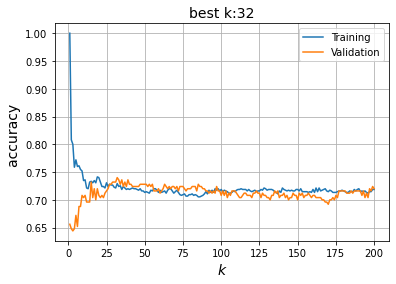

In [13]:
plt.plot(range(1,Kmax+1), acc_train, label='Training')
plt.plot(range(1,Kmax+1), acc_test, label='Validation')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('accuracy ', fontsize=14)
plt.title('best k:'+str(k_max), fontsize=14)
plt.legend()
plt.grid()
plt.show()

+ Como o peso de cada um dos k vizinhos é o mesmo, a classificação com o conjunto de treinamento, dependerá do valor de k.

+ Com k = 1, a superfície de decisão é bastante complexa, fazendo com que o "modelo" se sobreajuste à base de treinamento. 

+ Ou seja, para o conjunto de validação, quando k = 1, tem-se uma grande chance de erro, o que causa alta variância (sobreajuste). 

+ À medida que k aumenta, a superfície de decisão fica mais suave, fazendo com que o modelo não tenha complexidade necessária.

+ Ou seja, se aumentarmos k demais, podemos ter um modelo subajustado.

+ Quando aumentamos k, o erro de treinamento aumenta (i.e., aumenta-se o viés), mas o erro de validação diminui (i.e., diminui-se a variância).

+ Portanto, assim como antes, precisamos encontrar um ponto de balanço entre as duas forças.

Best k: 32


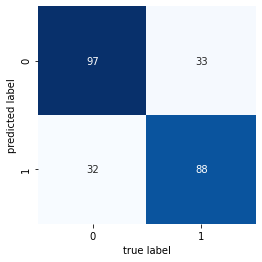

In [14]:
print('Best k:', k_max)
# Create an instance of Neighbours Classifier and fit the data with best k.
clf = KNeighborsClassifier(k_max, weights='uniform')
# Train the classifier.
clf.fit(x_train, y_train)
# Predict.
y_pred = clf.predict(x_test)

# Plot the confusion matrix.
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('confusion_matrix.png', dpi=600)
plt.show()

In [15]:
print('Accuracy of Logistic Regression model is:', accuracy_score(y_test, y_pred)*100, '%')

Accuracy of Logistic Regression model is: 74.0 %


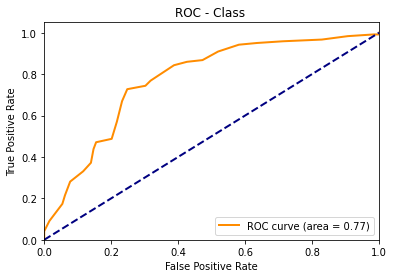

In [16]:
# Getting the probabilities for each class.
y_prob = clf.predict_proba(x_test)

# Compute ROC curve and ROC area for each class.
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
# Plotting ROC curve.
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class ')
plt.legend(loc="lower right")

#plt.savefig('roc.png', dpi=600)
plt.show()

In [17]:
# Print classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       129
           1       0.73      0.73      0.73       121

    accuracy                           0.74       250
   macro avg       0.74      0.74      0.74       250
weighted avg       0.74      0.74      0.74       250

